<a href="https://colab.research.google.com/github/Magikis/project-deep-learning/blob/master/ProjectDeepLearning_pytorchCIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
%pylab inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

Populating the interactive namespace from numpy and matplotlib
cuda:0


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imshow']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
means = (0.4914, 0.4822, 0.4465)
stds = (0.2023, 0.1994, 0.2010)
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(means, stds),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means, stds),
])

trainset = torchvision.datasets.CIFAR10(
    root='~/datasets',
    train=True,
    download=True,
    transform=transform_train
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=256,
    shuffle=True,
    num_workers=1
)

testset = torchvision.datasets.CIFAR10(
    root='~/datasets',
    train=False,
    download=True,
    transform=transform_test
)

testloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=256,
    shuffle=True,
    num_workers=1
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


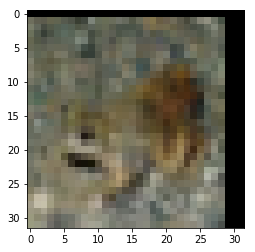

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(
        np.transpose(npimg, (1, 2, 0))
    )
    plt.show()



dataiter = iter(trainloader)
images, labels = dataiter.next()
for i in range(3):
    images[0, i] *= stds[i]
    images[0, i] += means[i]
im_to_show = torch.clamp(images[0], -1, 2).permute(1,2,0)

plt.imshow(im_to_show)

# [classes[x] for x in labels]
print(classes[labels[0]])

In [11]:
import resnet
net = resnet.ResNet18()
net.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [12]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
%%time
for epoch in range(40):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 60 == 59:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished traning')

[1,    60] loss: 0.065
[1,   120] loss: 0.056
[1,   180] loss: 0.051
[2,    60] loss: 0.046
[2,   120] loss: 0.044
[2,   180] loss: 0.041
[3,    60] loss: 0.039
[3,   120] loss: 0.037
[3,   180] loss: 0.035
[4,    60] loss: 0.033
[4,   120] loss: 0.033
[4,   180] loss: 0.031
[5,    60] loss: 0.030
[5,   120] loss: 0.029
[5,   180] loss: 0.029
[6,    60] loss: 0.027
[6,   120] loss: 0.027
[6,   180] loss: 0.026
[7,    60] loss: 0.025
[7,   120] loss: 0.025
[7,   180] loss: 0.025
[8,    60] loss: 0.023
[8,   120] loss: 0.023
[8,   180] loss: 0.023
[9,    60] loss: 0.022
[9,   120] loss: 0.022
[9,   180] loss: 0.021
[10,    60] loss: 0.020
[10,   120] loss: 0.020
[10,   180] loss: 0.020
[11,    60] loss: 0.019
[11,   120] loss: 0.019
[11,   180] loss: 0.019
[12,    60] loss: 0.018
[12,   120] loss: 0.018
[12,   180] loss: 0.017
[13,    60] loss: 0.017
[13,   120] loss: 0.017
[13,   180] loss: 0.016
[14,    60] loss: 0.016
[14,   120] loss: 0.016
[14,   180] loss: 0.016
[15,    60] loss: 0

In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 93 %


In [15]:
class_correct = [0.] * len(classes)
class_total = [0.] * len(classes)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
#         c = 
        for l, p in zip(labels, predicted):
            class_correct[l] += int(l == p)
            class_total[l] += 1

            
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))       

Accuracy of plane : 93 %
Accuracy of   car : 95 %
Accuracy of  bird : 91 %
Accuracy of   cat : 85 %
Accuracy of  deer : 92 %
Accuracy of   dog : 89 %
Accuracy of  frog : 96 %
Accuracy of horse : 93 %
Accuracy of  ship : 96 %
Accuracy of truck : 97 %


In [17]:
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix.astype(int))

AttributeError: 'Tensor' object has no attribute 'astype'